In [155]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from scipy.stats import norm, beta
from sklearn import metrics
plt.style.use('seaborn-poster')

%matplotlib inline


# define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"


/var/folders/k4/prf0vszx12n66pskd9lk22q80000gn/T/ipykernel_60856/2589656372.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [156]:
# display user's activities history data
activities = pd.read_csv(USER_ACTIVITY_PATH)
activities.head()


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,sent_catalog_link,2020-02-04 20:19:00.110416
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
4,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646


In [157]:
activities.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323893 entries, 0 to 323892
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   item_id           323893 non-null  object
 1   user_id           323893 non-null  object
 2   event_type        323893 non-null  object
 3   create_timestamp  323893 non-null  object
dtypes: object(4)
memory usage: 9.9+ MB


In [158]:
# display homes data
homes = pd.read_csv(HOME_DATA_PATH)
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [159]:
homes.describe()


,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [160]:
homes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


In [161]:
# visualize missing value
missing_stats = {}
for col in homes.columns:
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")


'Column item_id: has 0.0% missing data with 0 missing entries'

'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 0.06% missing data with 3 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

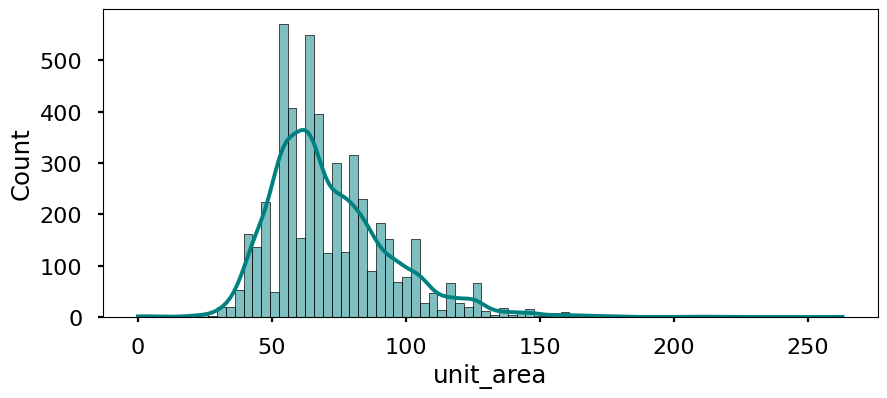

In [162]:
plt.figure(figsize=(10, 4))
sns.histplot(homes['unit_area'], color='teal', kde=True, bins=80)


In [163]:
# sanitize data
homes.drop(list(homes[homes.unit_area < 20].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.drop(list(homes[homes.property_age > 55].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [164]:
from sklearn.preprocessing import *
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))

homes.head()


,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,34,1.0,42,0,3.0,0.0,1,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,102,2.0,116,1,NaN,1.0,1,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,115,1.0,74,0,2.0,0.0,1,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,100,1.0,60,1,NaN,2.0,0,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,74,1.0,45,1,NaN,1.0,1,4.0


In [165]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats


['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [166]:
home_orig = homes.copy()

del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,-0.351107,-0.276876,-1.333738,-0.818353,-1.307482,-0.735340,-9.315229e-01,-0.693205,0.716913,1.167032
1,-0.214733,0.859492,0.202530,0.910532,1.942849,1.320184,4.271079e-16,-0.406392,0.716913,0.300776
2,-0.623854,0.101913,0.496228,-0.818353,0.098066,-0.735340,-1.893284e+00,-0.693205,0.716913,0.672028
3,-0.896602,-0.049602,0.157346,-0.818353,-0.516861,1.320184,4.271079e-16,-0.119579,-1.370156,-0.936734
4,-1.032975,0.064034,-0.430051,-0.818353,-1.175712,1.320184,4.271079e-16,-0.406392,0.716913,-1.184236


In [167]:


# remove rows that contains unused event
unused_events = [
    "seen_in_list",
    "suggest-new",
    "suggest_similar",
    "sent_catalog_link",
    # "visit_request-canceled",
    # "visit-canceled",
    # "meeting_request-canceled",
    # "meeting-canceled"
]

for event in unused_events:
    indexRows = activities[activities.event_type.str.contains(event)].index
    activities.drop(indexRows, inplace=True)
    activities.reset_index(drop=True, inplace=True)
display(activities.head())
#


,item_id,user_id,event_type,create_timestamp
0,00062bc5-2535-4b1e-bbcb-228526c990b8,182aa519-83a8-848f-84a1-8697046d84c2,seen,2020-02-03 15:47:25.273977
1,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,seen,2020-02-04 20:19:31.040304
2,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-canceled,2020-02-04 20:54:31.595305
3,00062bc5-2535-4b1e-bbcb-228526c990b8,189a081a-ae0f-499d-9092-01758d93fa7f,visit_request-new,2020-02-04 20:20:15.918646
4,00062bc5-2535-4b1e-bbcb-228526c990b8,69c257cd-8033-82aa-8950-8804a03c2ed1,seen,2020-02-05 10:18:54.229749


In [168]:
from pandas import DataFrame
import os


def assign_weight():
    # assign weight to events
    events_weight={
    "seen":20,
    "visit_request-new":30,
    "visit-new":30,
    "visit-unsuccess":-10,
    "visit-success":50,
    "meeting_request-new":70,
    "meeting-new":70,
    "meeting-unsuccess":70,
    "meeting-success":100,
    "deal-success":100,
    "visit_request-canceled":-10,
    "visit-canceled":-15,
    "meeting_request-canceled":-30,
    "meeting-canceled":-40,
    }
    users_items_points={}

    for _, activity in activities.iterrows():
        user_id=activity.user_id
        item_id=activity.item_id
        event_type=activity.event_type
        key=user_id+"-"+item_id
        if users_items_points.get(key)==None: 
            users_items_points[key]={
               "user_id": user_id,
                "item_id":item_id,
                "points":0
            }
         
        users_items_points[key]["points"]+=events_weight[event_type]
    
    pointDf= DataFrame(users_items_points.values())

    pointDf.to_csv(USER_ITEM_POINT_PATH,index=False)

if not os.path.isfile(USER_ITEM_POINT_PATH):
    assign_weight()

pointDf=pd.read_csv(USER_ITEM_POINT_PATH)
display(pointDf.head(5))





,user_id,item_id,points
0,182aa519-83a8-848f-84a1-8697046d84c2,00062bc5-2535-4b1e-bbcb-228526c990b8,20
1,189a081a-ae0f-499d-9092-01758d93fa7f,00062bc5-2535-4b1e-bbcb-228526c990b8,40
2,69c257cd-8033-82aa-8950-8804a03c2ed1,00062bc5-2535-4b1e-bbcb-228526c990b8,20
3,054f4d81-ee93-407c-af31-ff84c3a103a8,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20
4,08a44ae5-8419-88dd-8c61-8a9cd391677c,0019bb07-bb6d-44dd-b6b7-d1b5405338d2,20


In [170]:
"""find and remove invalid items"""
item_ids = np.unique(np.array(pointDf.item_id.values))
orig_item_ids = home_orig["item_id"].values

invalid_item_ids = [x for x in item_ids if x not in orig_item_ids]


print(f"found {len(invalid_item_ids)} ids that are not in property data")


pointDf.drop(pointDf[pointDf.item_id.isin(
    invalid_item_ids)].index, inplace=True)
pointDf.reset_index(drop=True, inplace=True)

# display(orig_item_ids)
# display(home_orig[np.where(home_orig.item_id.isin(item_ids)==False)])


found 13 ids that are not in property data


In [ ]:
point_matrix = pointDf.values
points_train, points_test = train_test_split(point_matrix, test_size=0.2)
print(points_train.shape)
print(points_test.shape)


(76914, 3)
(19229, 3)


In [ ]:
input_cols = ["deposit", "monthly_rent", "room_qty", "unit_area", "has_elevator",
              "build_floor_count", "unit_floor", "has_storage", "property_age"]
homes.head()


,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0,0,34,1.0,42,0,3.000000,0.0,1,23.0
1,72000000.0,4320000,102,2.0,116,1,3.968559,1.0,1,16.0
2,50400000.0,1440000,115,1.0,74,0,2.000000,0.0,1,19.0
3,36000000.0,864000,100,1.0,60,1,3.968559,2.0,0,6.0
4,28800000.0,1296000,74,1.0,45,1,3.968559,1.0,1,4.0


In [ ]:
def get_items_point_by_user(point_matrix, user_id):
    "all user id"
    y = point_matrix[:, 0]
    # get rows where user_id == input user_id
    filtered = point_matrix[np.where(y == user_id)]
    item_ids = filtered[:, 1].flatten()
    points = filtered[:, 2].flatten()
    return (item_ids, points)


In [ ]:
"""train ridge model"""
from sklearn.linear_model import Ridge
from sklearn import linear_model


unique_user_id_train = np.unique(points_train[:, 0])

n_users = len(unique_user_id_train)

d = home.shape[1]  # data dimension
W = np.zeros((d, n_users))
b = np.zeros((1, n_users))

for n in range(n_users):
    #print(f"start training for user: {unique_user_id_train[n]}")
    ids, points = get_items_point_by_user(
        points_train, unique_user_id_train[n])

    clf = Ridge(alpha=0.01, fit_intercept=True)
    Xhat = home[home_orig.item_id.isin(ids)]
    clf.fit(Xhat, points)
    trained_weight = clf.coef_
    trained_b = clf.intercept_
    W[:, n] = trained_weight
    b[0, n] = trained_b
    if len(ids) > 10:
        # n_house x 2
        print(Xhat.dot(trained_weight) + trained_b)


17      15.074989
340     37.641309
403     17.888105
665     22.432849
1184    23.480686
1243    17.979346
1358    47.888224
1416    25.686234
1742    17.263785
2171    25.057646
2256    12.706365
2454    35.196997
2781    29.643580
2785    27.384513
2825    34.675372
dtype: float64
307     20.0
766     20.0
1176    20.0
1291    20.0
1532    20.0
1640    20.0
1642    20.0
2800    20.0
2873    20.0
3306    20.0
3384    20.0
3429    20.0
4253    20.0
dtype: float64
11      18.742765
54      19.860432
93      21.293053
236     23.412918
271     18.348392
          ...    
4670    19.365660
4797    18.112457
4824    23.455404
4888    21.899831
4890    17.800577
Length: 82, dtype: float64
330     20.0
403     20.0
474     20.0
499     20.0
508     20.0
766     20.0
808     20.0
1233    20.0
1489    20.0
1496    20.0
1672    20.0
1871    20.0
2004    20.0
2463    20.0
2521    20.0
2631    20.0
2663    20.0
2710    20.0
2760    20.0
2764    20.0
3168    20.0
3273    20.0
3307    20.0
3582   

In [ ]:
#cols: users
#rows: houses
# value: predicted point
Yhat = np.array(home.dot(W) + b)
print(Yhat.shape)
print(home.shape)
print(W.shape)


(4917, 15490)
(4917, 10)
(10, 15490)


In [ ]:
print(Yhat[:, 2].shape)
print(home.shape)


(4917,)
(4917, 10)


In [ ]:

unique_user_id_test = np.unique(points_test[:, 0])
for i in range(len(unique_user_id_test)-1):
    n = i
    np.set_printoptions(precision=2)  # 2 digits after .
    ids, points = get_items_point_by_user(points_test, unique_user_id_test[n])
    id_indexs = home[home_orig.item_id.isin(ids)].index.tolist()
    if len(ids) > 10:
        print("For user: ", unique_user_id_test[n])
        print('Rated real estate ids :', ids)
        print('True ratings     :', points)
        print('Predicted ratings:', Yhat[id_indexs, n])
        print('RMSE: ', metrics.mean_squared_error(
            Yhat[id_indexs, n], points, squared=False),)

        print('Predicted ratings for the first 100 items:', Yhat[0:100, n])

        print("\n-------\n")


For user:  006842a9-8da3-4e9a-9a23-68535983aee0
Rated real estate ids : ['b3601cfd-b174-408d-b617-977bbb5665b2'
 '0f052bb4-d0be-4efd-b668-d6c4d6b7df58'
 'ce0bc075-ceb5-417b-8297-59ebbb3716b6'
 'd1d8d9be-5d16-4d34-85b9-08b734b1b3d0'
 '1c29e6f7-b73e-46c2-807b-b0825d2ed568'
 'be8bee2f-6619-48bb-b893-b1fcbe0be7b0'
 '2b989dcf-73eb-4082-bbeb-4b7496cbb22c'
 'cbd8e4c8-dd85-4e0c-bb53-7b8c63b378c8'
 'e4694f42-c509-4171-bbbc-0fb87480b249'
 '07b82361-9246-454e-bcb3-e1d4d13f56b4'
 '0c2c2b34-988c-4bbb-91f5-7e74e33ebb72'
 'ee498f11-8ffb-4c59-963d-995f1e436c01'
 '5538b166-b731-4bb6-93b8-3cc23f700b2d'
 'd7b3b367-b277-4c6f-b7bb-7438eb9be877'
 '81b2776f-6eb8-48e9-b1eb-bd3895447e07'
 '1e06df64-c58e-4415-b5d8-b7ccbcb20ee6'
 'f106fcbb-9fc3-4e73-b35d-e0b0b520bb87'
 '5eb4d4b9-d4f7-4413-977c-d472bb1249f8'
 '08ef7392-65d5-46d3-8c1b-882dd7b53426']
True ratings     : [20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20]
Predicted ratings: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 2

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse


class uuCF(object):
    def __init__(self, Y_data, k, sim_func=cosine_similarity):
        self.Y_data = Y_data  # a 2d array of shape (n_users, 3)
        # each row of Y_data has form [user_id, item_id, rating]
        self.k = k  # number of neighborhood
        self.sim_func = sim_func  # similarity function, default: cosine_similarity
        self.Ybar = None  # normalize data
        self.n_users = len(np.unique(self.Y_data[:,0]))  # number of users
        self.n_items = len(np.unique(self.Y_data[:,1]))  # number of items

    def fit(self):

        # normalized Y_data -> Ybar
        users = self.Y_data[:, 0]  # all users - first column of Y_data
        self.Ybar = self.Y_data.copy()
        self.mu = np.zeros((self.n_users,))
        for n in range(self.n_users):
            # row indices of ratings made by user n
            ids = np.where(users == n)[0].astype(np.int32)
            # indices of all items rated by user n
            item_ids = self.Y_data[ids, 1]
            # ratings made by user n
            ratings = self.Y_data[ids, 2]
            # avoid zero division
            self.mu[n] = np.mean(ratings) if ids.size > 0 else 0
            self.Ybar[ids, 2] = ratings - self.mu[n]
            # form the rating matrix as a sparse matrix.
            # see more: https://goo.gl/i2mmT2
            self.Ybar = sparse.coo_matrix((self.Ybar[:, 2],
                                        (self.Ybar[:, 1], self.Ybar[:, 0])), (self.n_items, self.n_users)).tocsr()
            self.S = self.sim_func(self.Ybar.T, self.Ybar.T)

    def pred(self, u, i):
        """ predict the rating of user u for item i"""
        # find item i
        ids = np.where(self.Y_data[:, 1] == i)[0].astype(np.int32)
        # all users who rated i
        users_rated_i = (self.Y_data[ids, 0]).astype(np.int32)
        # similarity of u and users who rated i
        sim = self.S[u, users_rated_i]
        # most k similar users
        nns = np.argsort(sim)[-self.k:]
        nearest_s = sim[nns]  # and the corresponding similarities
        # the corresponding ratings
        r = self.Ybar[i, users_rated_i[nns]]
        eps = 1e-8  # a small number to avoid zero division
        return (r*nearest_s).sum()/(np.abs(nearest_s).sum() + eps) + self.mu[u]


In [230]:
home.values

array([[-0.35, -0.28, -1.33, ..., -0.69,  0.72,  1.17],
       [-0.21,  0.86,  0.2 , ..., -0.41,  0.72,  0.3 ],
       [-0.62,  0.1 ,  0.5 , ..., -0.69,  0.72,  0.67],
       ...,
       [-1.24,  0.06,  1.4 , ..., -0.41,  0.72, -0.57],
       [ 0.06, -0.28,  0.65, ...,  0.45, -1.37,  0.18],
       [ 0.47,  0.01, -0.9 , ...,  0.17, -1.37, -0.94]])

In [ ]:
# user-based collaborative filtering

from sklearn.neighbors import NearestNeighbors



utility_matrix=sparse.coo_matrix((point_matrix[:, 2],
                                        (point_matrix[:, 1], point_matrix[:, 0])), (n_items, n_users)).tocsr()
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(home.values)
distances, indices = knn.kneighbors(home.values, n_neighbors=3)
print(indices)


[[   0 4649 3872]
 [   1 2123 2487]
 [   2 4811 4678]
 ...
 [4914 1679 4762]
 [4915  147 2468]
 [4916 3633 3123]]


In [ ]:
# get the index for 'movie_0'
index_for_movie = 0
# find the indices for the similar movies
sim_movies = indices[index_for_movie].tolist()
# distances between 'movie_0' and the similar movies
movie_distances = distances[index_for_movie].tolist()
# the position of 'movie_0' in the list sim_movies
id_movie = sim_movies.index(index_for_movie)
# remove 'movie_0' from the list sim_movies
sim_movies.remove(index_for_movie)
# remove 'movie_0' from the list movie_distances
movie_distances.pop(id_movie)
print('The Nearest Movies to movie_0:', sim_movies)
print('The Distance from movie_0:', movie_distances)


The Nearest Movies to movie_0: [4649, 3872]
The Distance from movie_0: [0.026645679800719524, 0.028373235867616753]


In [188]:
pointDf.groupby(["item_id"])
#['990eae96-a557-4065-a847-d249c28d47ae', '0034ee84-2477-41be-8cdc-db2bbc5c7b2b', 20]


In [ ]:
# copy df
df1 = home.copy()

# find the nearest neighbors using NearestNeighbors(n_neighbors=3)
number_neighbors = 3
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(home.values)
distances, indices = knn.kneighbors(home.values, n_neighbors=number_neighbors)

# convert user_name to user_index

user_id = "990eae96-a557-4065-a847-d249c28d47ae"
user_indexes = np.where(point_matrix[:, 0] == user_id)


# t: movie_title, m: the row number of t in df
for index, house_id in list(enumerate(home_orig.item_id)):

    # find movies without ratings by user_4
    if point_matrix[user_indexes, 3] == 0:
        sim_movies = indices[m].tolist()
        movie_distances = distances[m].tolist()

        # Generally, this is the case: indices[3] = [3 6 7]. The movie itself is in the first place.
        # In this case, we take off 3 from the list. Then, indices[3] == [6 7] to have the nearest NEIGHBORS in the list.
        if m in sim_movies:
            id_movie = sim_movies.index(m)
            sim_movies.remove(m)
            movie_distances.pop(id_movie)

        # However, if the percentage of ratings in the dataset is very low, there are too many 0s in the dataset.
        # Some movies have all 0 ratings and the movies with all 0s are considered the same movies by NearestNeighbors().
        # Then,even the movie itself cannot be included in the indices.
        # For example, indices[3] = [2 4 7] is possible if movie_2, movie_3, movie_4, and movie_7 have all 0s for their ratings.
        # In that case, we take off the farthest movie in the list. Therefore, 7 is taken off from the list, then indices[3] == [2 4].
        else:
            sim_movies = sim_movies[:number_neighbors-1]
            movie_distances = movie_distances[:number_neighbors-1]

        # movie_similarty = 1 - movie_distance
        movie_similarity = [1-x for x in movie_distances]
        movie_similarity_copy = movie_similarity.copy()
        nominator = 0

        # for each similar movie
        for s in range(0, len(movie_similarity)):

            # check if the rating of a similar movie is zero
            if home.iloc[sim_movies[s], user_index] == 0:

                # if the rating is zero, ignore the rating and the similarity in calculating the predicted rating
                if len(movie_similarity_copy) == (number_neighbors - 1):
                    movie_similarity_copy.pop(s)

                else:
                    movie_similarity_copy.pop(
                        s-(len(movie_similarity)-len(movie_similarity_copy)))

            # if the rating is not zero, use the rating and similarity in the calculation
            else:
                nominator = nominator + \
                    movie_similarity[s]*home.iloc[sim_movies[s], user_index]

        # check if the number of the ratings with non-zero is positive
        if len(movie_similarity_copy) > 0:

            # check if the sum of the ratings of the similar movies is positive.
            if sum(movie_similarity_copy) > 0:
                predicted_r = nominator/sum(movie_similarity_copy)

            # Even if there are some movies for which the ratings are positive, some movies have zero similarity even though they are selected as similar movies.
            # in this case, the predicted rating becomes zero as well
            else:
                predicted_r = 0

        # if all the ratings of the similar movies are zero, then predicted rating should be zero
        else:
            predicted_r = 0

    # place the predicted rating into the copy of the original dataset
        df1.iloc[m, user_index] = predicted_r


IndexError: index 100 is out of bounds for axis 0 with size 10